In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc 

<center>
    $f(x)= e^{-0.1x} sen(x)$
</center>

<center>
    $f´(x)= -0.1e^{-0.1x}\sin \left(x\right)+e^{-0.1x}\cos \left(x\right)$
</center>

In [49]:
x=np.linspace(2*-np.pi, 2*np.pi, 100)
f= lambda x: (np.e**(-0.1*x))*np.sin(x)
y= f(x)
X = np.fft.fft(y)
N=len(y)
freq=np.fft.fftfreq(N,1)
ffta=np.abs(X)

<StemContainer object of 3 artists>

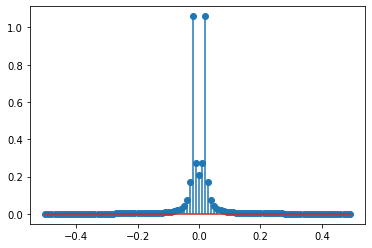

In [50]:
plt.stem(freq, 2.*ffta/N, use_line_collection="True")

In [51]:
#Mask
mask= freq < 0
X2=X.copy()
X2[mask]=0.
ffta2=np.abs(X2)

<StemContainer object of 3 artists>

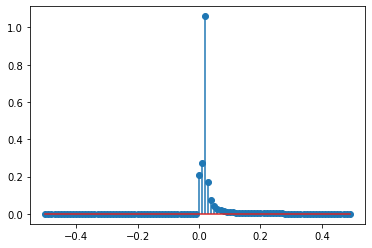

In [52]:
plt.stem(freq, 2.*ffta2/N, use_line_collection="True")

In [53]:
max_=np.argmax(ffta2)
f0=freq[max_]
print(f0)

0.02


In [66]:
#Derivada espectral

factor= X*f0**1j
derivada= np.fft.ifft(factor)
#print(derivada)

In [55]:
#Derivada exacta
fp= lambda x: (-0.1*(np.e**(-0.1*x))*np.sin(x))+((np.e**(0.1*x))*np.cos(x))
yp=fp(x)

In [61]:
#Derivada derecha
def deriv(h):
    d=(f(x+h)-f(x))/h
    return d
de=deriv(0.00001)

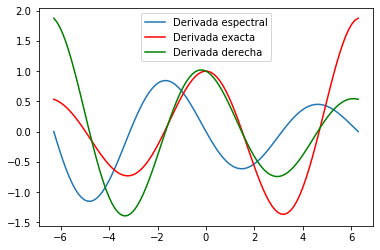

In [64]:
plt.plot(x, derivada, label="Derivada espectral")
plt.plot(x,yp, c="r", label="Derivada exacta")
plt.plot(x,de, c="g", label="Derivada derecha")
plt.legend()